<a href="https://colab.research.google.com/github/JJ-Indian/DSlab/blob/main/XGBOOST_water_safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Water_Quality.csv')

In [4]:
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [6]:
data.shape

(7996, 21)

In [8]:
data['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [9]:
data['is_safe'].value_counts(normalize = True)

0    0.885943
1    0.114057
Name: is_safe, dtype: float64

In [15]:
X = data.iloc[:,:-1]
X

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7992,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7993,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [13]:
y = data.iloc[:,-1]
y

0       1
1       1
2       0
3       1
4       1
       ..
7991    1
7992    1
7993    1
7994    1
7995    1
Name: is_safe, Length: 7996, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.30, shuffle = True, random_state=0) 

In [27]:
X_train.shape, X_test.shape

((5597, 20), (2399, 20))

In [28]:
X_train

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
2148,0.13,9.34,0.04,1.39,0.004,7.59,0.19,1.22,1.06,0.27,0.008,0.103,3.70,1.42,0.007,20.28,4.35,0.01,0.41,0.07
607,3.61,18.91,0.02,2.11,0.009,6.53,0.38,0.67,1.26,0.38,0.007,0.105,18.85,1.67,0.000,3.13,2.22,0.08,0.46,0.02
5276,0.03,13.25,0.08,0.08,0.060,0.02,0.04,1.21,1.09,0.00,0.770,0.158,2.12,0.97,0.004,0.06,0.30,0.05,0.09,0.08
6028,0.02,25.34,0.08,0.38,0.050,0.00,0.04,0.46,1.41,0.08,0.006,0.049,9.64,1.43,0.006,4.06,0.74,0.03,0.06,0.00
1732,0.28,10.32,0.13,4.82,0.020,6.89,0.20,0.07,0.73,0.06,0.001,0.157,11.64,2.83,0.006,26.23,1.34,0.03,0.06,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.05,5.69,0.09,1.89,0.050,0.46,0.08,0.08,1.37,0.00,0.840,0.032,4.38,0.76,0.007,1.04,0.33,0.07,0.06,0.00
3264,0.11,22.64,0.19,0.02,0.050,7.88,0.06,0.28,0.28,0.19,0.000,0.137,18.61,1.55,0.009,13.43,6.93,0.10,0.26,0.02
1653,2.38,16.13,0.33,1.79,0.070,2.15,0.51,0.46,0.74,0.48,0.001,0.072,13.56,1.66,0.005,29.13,4.31,0.09,0.28,0.08
2607,0.03,18.91,0.02,2.11,0.009,6.53,0.38,0.67,1.26,0.38,0.007,0.105,18.85,1.67,0.000,3.13,2.22,0.08,0.46,0.02


In [29]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 1000, max_depth =10, learning_rate = 0.1)
classifier.fit(X_train, y_train)


XGBClassifier(max_depth=10, n_estimators=1000)

In [30]:
y_pred=classifier.predict(X_test)
pd.DataFrame(data={'Actual Labels': y_test, 'Predicted Labels': y_pred}).head()

,Actual Labels,Predicted Labels
2799,0,0
1675,0,0
6358,0,0
543,0,0
3212,0,0


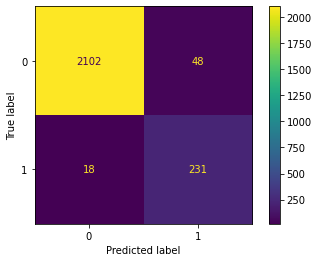

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(y_pred,y_test,  labels=classifier.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [42]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.972488536890371

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2120
           1       0.93      0.83      0.87       279

    accuracy                           0.97      2399
   macro avg       0.95      0.91      0.93      2399
weighted avg       0.97      0.97      0.97      2399

